<h1 style='color:red' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h1>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification
<img src="small_images.jpg" />

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

import matplotlib.pyplot as plt
import seaborn as sns

<h3 style="color:purple">Load the dataset</h3>

In [2]:
(X_train, Y_train), (X_test,Y_test) = datasets.cifar10.load_data()
(X_train.shape, Y_train.shape), (X_test.shape, Y_test.shape)

(((50000, 32, 32, 3), (50000, 1)), ((10000, 32, 32, 3), (10000, 1)))

In [3]:
pd.DataFrame(Y_train).value_counts()

0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
dtype: int64

In [4]:
class_names = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer", 5:"dog", 6: "frog", 7: "horse", 8:"ship", 9:"truck"}
class_names

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [5]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

**y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array**

In [6]:
Y_train = Y_train.reshape(-1,)
Y_test = Y_test.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

Let's plot some images to see what they are 

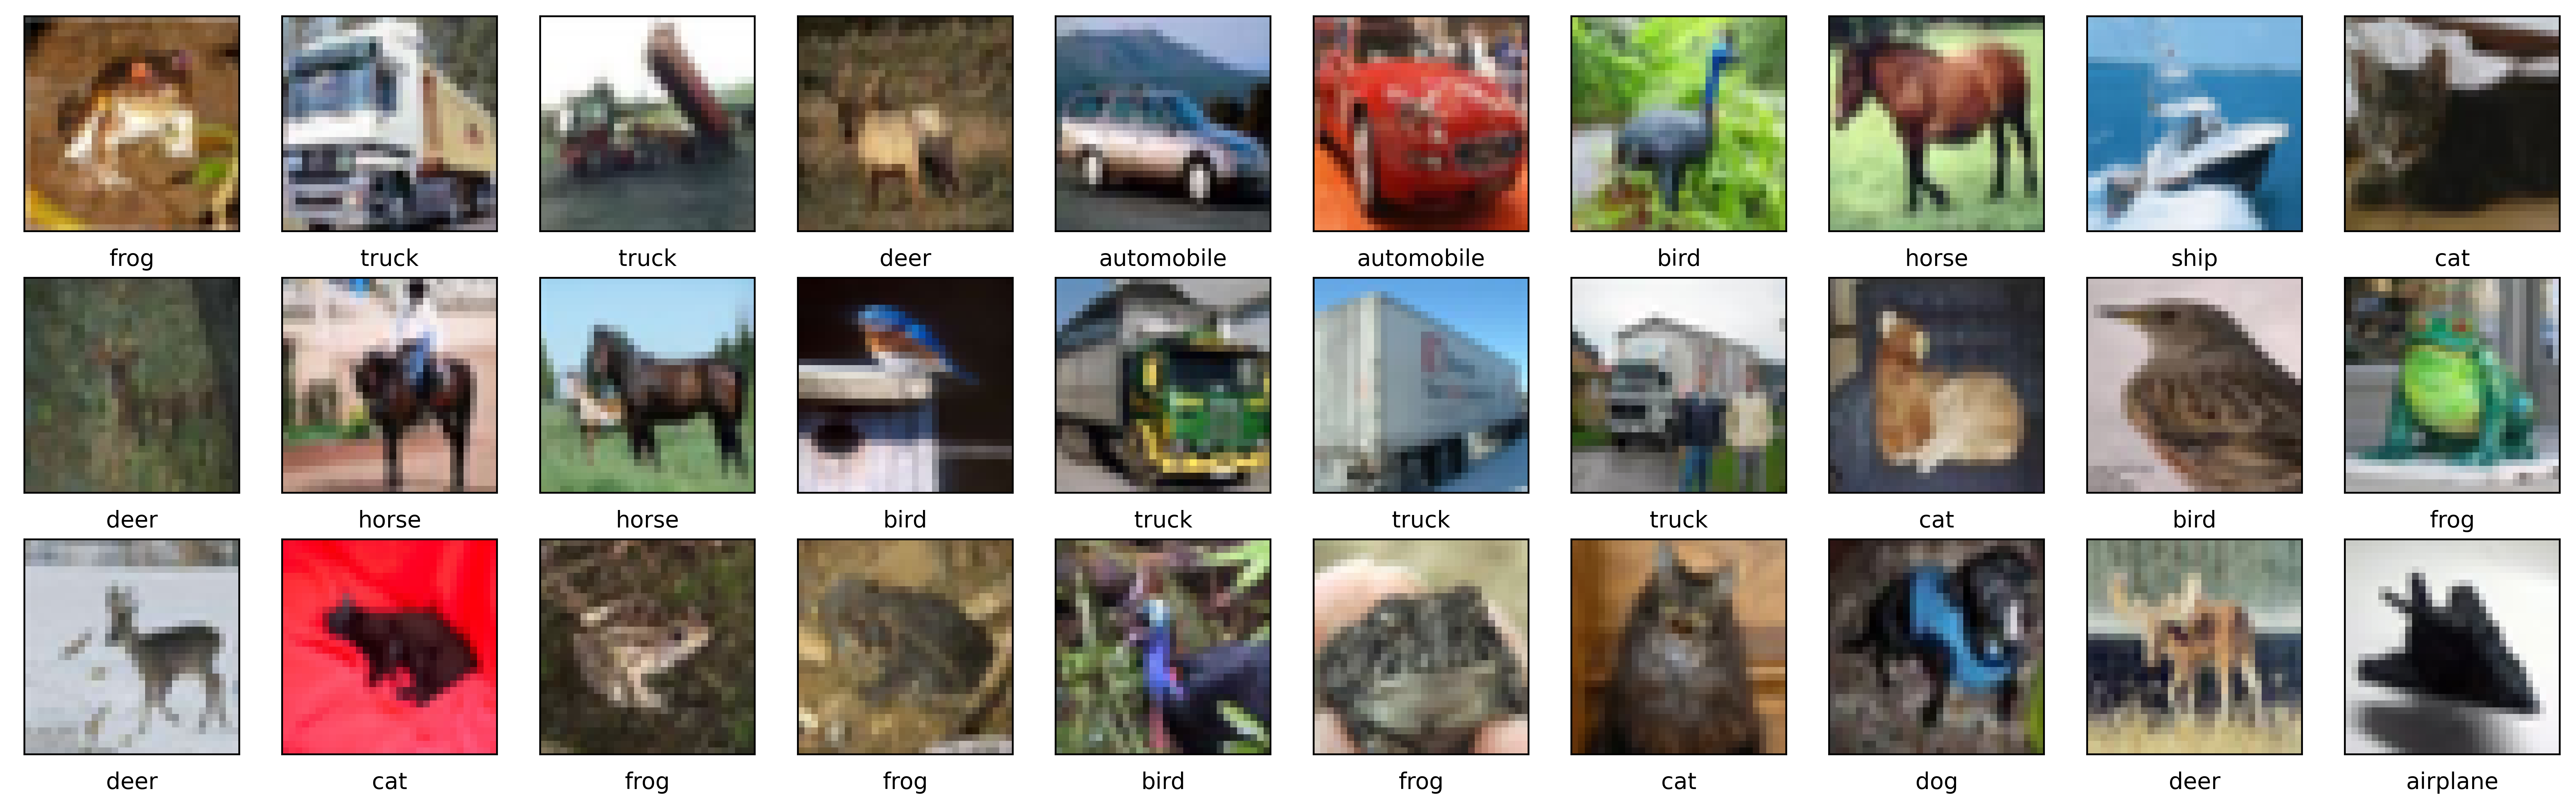

In [7]:
plt.figure(figsize=(20,6), dpi = 523)
for i in range(30):
    plt.subplot(3,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[Y_train[i]])                   # Adding label as the value of handwritten digit
plt.show()

<h4 style="color:purple">Spliting Training and Validation set</h4>

In [8]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, train_size=0.8, random_state=2, stratify=Y_train)

In [9]:
pd.DataFrame(y_train).value_counts()

0    4000
1    4000
2    4000
3    4000
4    4000
5    4000
6    4000
7    4000
8    4000
9    4000
dtype: int64

<h4 style="color:purple">Normalization</h4>

In [10]:
x_train, x_val, x_test = x_train / 255.0, x_val/255.0, X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [11]:
ann = models.Sequential(
    [
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(1000, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1000)              3073000   
                                                                 
 dense_1 (Dense)             (None, 100)               100100    
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 3,174,110
Trainable params: 3,174,110
Non-trainable params: 0
_________________________________________________________________


In [12]:
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

history = ann.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
1250/1250 [==============================] - 17s 13ms/step - loss: 1.8811 - accuracy: 0.3253 - val_loss: 1.7540 - val_accuracy: 0.3896
Epoch 2/5
1250/1250 [==============================] - 20s 16ms/step - loss: 1.6940 - accuracy: 0.3984 - val_loss: 1.6455 - val_accuracy: 0.4170
Epoch 3/5
1250/1250 [==============================] - 17s 14ms/step - loss: 1.6120 - accuracy: 0.4308 - val_loss: 1.6022 - val_accuracy: 0.4317
Epoch 4/5
1250/1250 [==============================] - 18s 14ms/step - loss: 1.5558 - accuracy: 0.4506 - val_loss: 1.5512 - val_accuracy: 0.4542
Epoch 5/5
1250/1250 [==============================] - 17s 14ms/step - loss: 1.5133 - accuracy: 0.4639 - val_loss: 1.6281 - val_accuracy: 0.4070


**You can see that at the end of 5 epochs, accuracy is at around 48%**

In [13]:
ann.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 221.7089 - accuracy: 0.3899


[221.70887756347656, 0.38989999890327454]

In [14]:
y_pred = ann.predict(X_test)
y_pred_classes = [class_names[np.argmax(element)] for element in y_pred]
Test = [class_names[i] for i in Y_test]

313/313 [==============================] - 2s 5ms/step


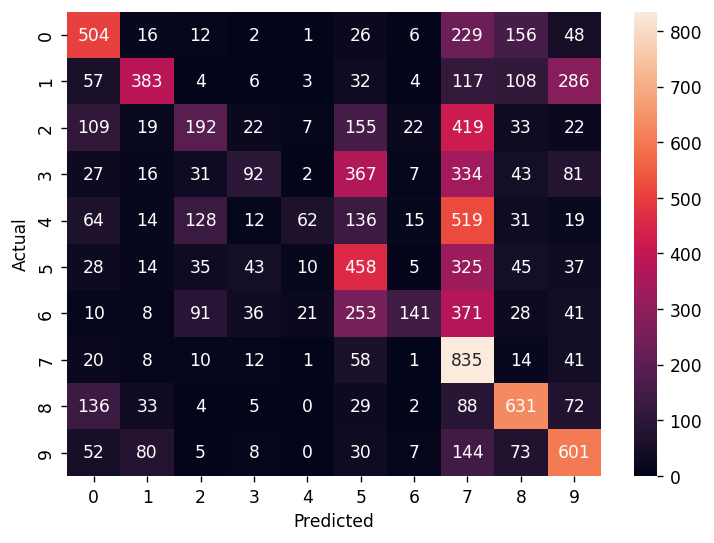

In [15]:
plt.figure(figsize=(7,5), dpi = 123)
sns.heatmap(confusion_matrix(Test, y_pred_classes), annot=True, fmt = 'd')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [16]:
print("Classification Report: \n", classification_report(Test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

    airplane       0.50      0.50      0.50      1000
  automobile       0.65      0.38      0.48      1000
        bird       0.38      0.19      0.25      1000
         cat       0.39      0.09      0.15      1000
        deer       0.58      0.06      0.11      1000
         dog       0.30      0.46      0.36      1000
        frog       0.67      0.14      0.23      1000
       horse       0.25      0.83      0.38      1000
        ship       0.54      0.63      0.58      1000
       truck       0.48      0.60      0.53      1000

    accuracy                           0.39     10000
   macro avg       0.47      0.39      0.36     10000
weighted avg       0.47      0.39      0.36     10000



In [17]:
f1_score =  (0.64*0.45)/((0.64+0.45)/2)

<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(500, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 128)        

In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
history = cnn.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 240s 191ms/step - loss: 1.7003 - accuracy: 0.3734 - val_loss: 1.4943 - val_accuracy: 0.4459
Epoch 2/10
1250/1250 [==============================] - 250s 200ms/step - loss: 1.3308 - accuracy: 0.5212 - val_loss: 1.2304 - val_accuracy: 0.5675
Epoch 3/10
1250/1250 [==============================] - 230s 184ms/step - loss: 1.1889 - accuracy: 0.5775 - val_loss: 1.1411 - val_accuracy: 0.5987
Epoch 4/10
1250/1250 [==============================] - 353s 282ms/step - loss: 1.0936 - accuracy: 0.6089 - val_loss: 1.0123 - val_accuracy: 0.6471
Epoch 5/10
1250/1250 [==============================] - 228s 182ms/step - loss: 1.0196 - accuracy: 0.6387 - val_loss: 1.0112 - val_accuracy: 0.6461
Epoch 6/10
1250/1250 [==============================] - 376s 301ms/step - loss: 0.9682 - accuracy: 0.6561 - val_loss: 0.8965 - val_accuracy: 0.6856
Epoch 7/10
1250/1250 [==============================] - 213s 171ms/step - loss: 0.9116 - accuracy: 0.6751 - val_

### Evaluation

**With CNN, at the end 5 epochs, accuracy was at around 70.28% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [21]:
loss, accuracy = cnn.evaluate(x_test, Y_test)
print('The accuracy of model on unknown data is',round((accuracy*100),2),'%')

313/313 [==============================] - 16s 50ms/step - loss: 0.8695 - accuracy: 0.6976
The accuracy of model on unknown data is 69.76 %


In [ ]:
history = cnn.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

In [ ]:
loss, accuracy = cnn.evaluate(x_test, Y_test)
print('The accuracy of model on unknown data is',round((accuracy*100),2),'%')

In [22]:
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']                        # Accuracy obtained on training data
val_acc = history_dict['val_accuracy']                # Accuracy obtained on Validation data

loss = history_dict['loss']                                  # Losses obtained on training data
val_loss = history_dict['val_loss']                          # Losses obtained on validation data

#### Training and validation loss

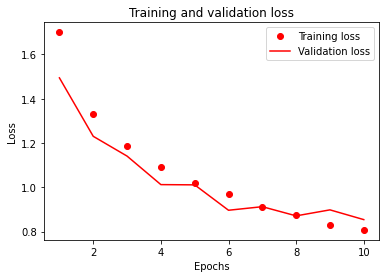

In [23]:
epochs = range(1, len(acc) + 1)                              # Epoch = range(1, 10+1)  10 iterations        

# Training Loss
plt.plot(epochs, loss, 'ro', label='Training loss')          # "ro" is for "red dot"
# Validation Loss
plt.plot(epochs, val_loss, 'r', label='Validation loss')     # r is for "solid red line"

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Training and validation accuracy

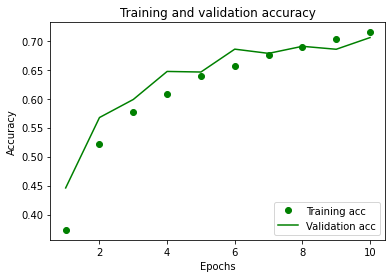

In [24]:
# Training accuracy
plt.plot(epochs, acc, 'go', label='Training acc')                 # "go" is for "green dot"
# Validation accuracy
plt.plot(epochs, val_acc, 'g', label='Validation acc')            # g is for "solid green line"
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

### Prediction

In [25]:
y_pred = cnn.predict(x_test)
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

313/313 [==============================] - 16s 49ms/step


[3, 1, 8, 0, 4]

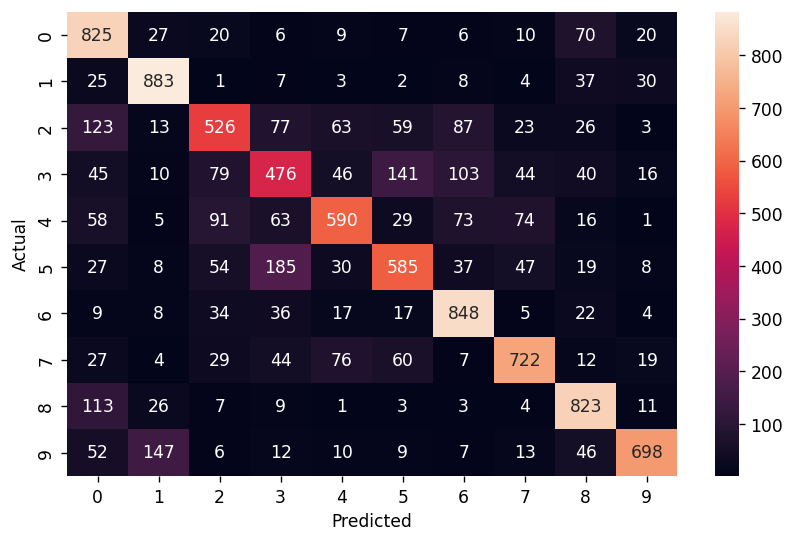

In [26]:
plt.figure(figsize=(8,5), dpi = 123)
sns.heatmap(confusion_matrix(Y_test, y_classes), annot=True, fmt = 'd')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [27]:
pred_classes = [class_names[element] for element in y_classes]
Test = [class_names[i] for i in Y_test]
print(classification_report(Test, pred_classes))

              precision    recall  f1-score   support

    airplane       0.63      0.82      0.72      1000
  automobile       0.78      0.88      0.83      1000
        bird       0.62      0.53      0.57      1000
         cat       0.52      0.48      0.50      1000
        deer       0.70      0.59      0.64      1000
         dog       0.64      0.58      0.61      1000
        frog       0.72      0.85      0.78      1000
       horse       0.76      0.72      0.74      1000
        ship       0.74      0.82      0.78      1000
       truck       0.86      0.70      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(28, 28,1)),
        layers.experimental.preprocessing.RandomContrast(0.5),
        #layers.experimental.preprocessing.RandomTranslation(height_factor=0.2,width_factor=(-0.2, 0.3), fill_mode='reflect'),
        #layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1)
    ]
)

In [28]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

dog


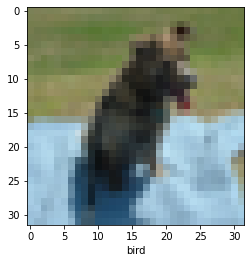

In [29]:
i = 550
plt.imshow(X_test[i])
plt.xlabel(pred_classes[i])
print(class_names[Y_test[i]])

In [30]:
classes[y_classes[3]]

NameError: name 'classes' is not defined

In [ ]:
classes[y_classes[3]]